In [11]:
import numpy as np
import pandas as pd

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from collections import Counter

import matplotlib.pyplot as plt

import plotly as py
import plotly.express as px
import plotly.tools as tls
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df=pd.read_csv("SelfShiksha_MCQ_57.csv")

In [4]:
df

# The last column "is_anomaly" contains the class 0 and 1
# There are 9 parameters in this dataset using which you need to predict the class (0 or 1) as mentioned in the last column (is_anomaly) 

,param1,param2,param3,param4,param5,param6,param7,param8,param9,is_anomaly
0,0.00089,33.0,0.0,0.0,72.0,2.46592,3,4,0,0
1,0.00111,32.0,0.0,1.0,34.0,3.22492,1,4,1,0
2,0.00141,16.0,0.0,1.0,58.0,1.68992,5,4,1,0
3,0.00148,91.0,0.0,0.0,11.0,1.08032,6,9,1,0
4,0.00152,80.0,1.0,1.0,18.0,0.39396,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...
5494,0.99855,82.0,0.0,0.0,64.0,3.30964,3,8,0,0
5495,0.99870,63.0,0.0,1.0,15.0,2.59728,5,7,1,0
5496,0.99887,83.0,1.0,1.0,37.0,1.29752,5,8,0,0
5497,0.99914,52.0,1.0,0.0,83.0,3.77504,4,1,1,1


In [ ]:
df.info()

In [5]:
# Since the data has null values, we need to drop some of the rows.
# You can also try to figure out how to fill in the missing values, but thats not relevant for the given question.

df.dropna(inplace=True)

In [ ]:
df.info()

In [ ]:
df.value_counts(['param1'])

In [ ]:
df.value_counts(['is_anomaly'])

In [6]:
# x=df.drop(['is_anomaly'],axis=1)
x = np.array(df['param8']).reshape(-1, 1)
y=list(df['is_anomaly'])

x = MinMaxScaler().fit_transform(x)

# LOGISTIC REGRESSION

LogReg = LogisticRegression()
LogReg.fit(x,y)

y_pred=LogReg.predict(x)
accuracy = metrics.accuracy_score(y, y_pred)
print(accuracy)

x_value = [[0.1]]
y_pred=LogReg.predict(x_value)
print(x_value,y_pred,LogReg.predict_proba(x_value))

0.505880191106211
[[0.1]] [1] [[0.49394896 0.50605104]]


In [ ]:
for col in df.columns:
  x = np.array(df[col]).reshape(-1, 1)
  y=list(df['is_anomaly'])

  x = MinMaxScaler().fit_transform(x)

  # LOGISTIC REGRESSION

  LogReg = LogisticRegression()
  LogReg.fit(x,y)

  y_pred=LogReg.predict(x)
  accuracy = metrics.accuracy_score(y, y_pred)
  print(round(accuracy,3))

In [7]:
x=df.drop(['is_anomaly'],axis=1)
y=list(df['is_anomaly'])

x = MinMaxScaler().fit_transform(x)

# LOGISTIC REGRESSION

LogReg = LogisticRegression()
LogReg.fit(x,y)

y_pred=LogReg.predict(x)
accuracy = metrics.accuracy_score(y, y_pred)
print(round(accuracy,3))

0.906


In [10]:
confusion_matrix(y, y_pred)

array([[2439,  250],
       [ 262, 2491]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



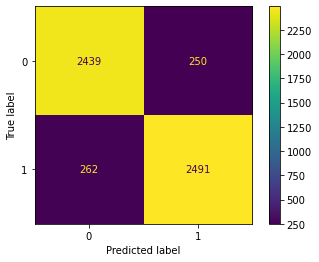

In [12]:
plot_confusion_matrix(LogReg,x,y)

## Usual practice is to split the data into a training and a testing set
## which we will learn about soon.

In [ ]:
x=df.drop(['is_anomaly'],axis=1)
y=list(df['is_anomaly'])

x = MinMaxScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [ ]:
# LOGISTIC REGRESSION

LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)